## Text Generation with HuggingFace

- Text generation is a natural language processing task that involves creating coherent and contextually relevant textual content. It can be both creative and utilitarian, finding applications in various domains.


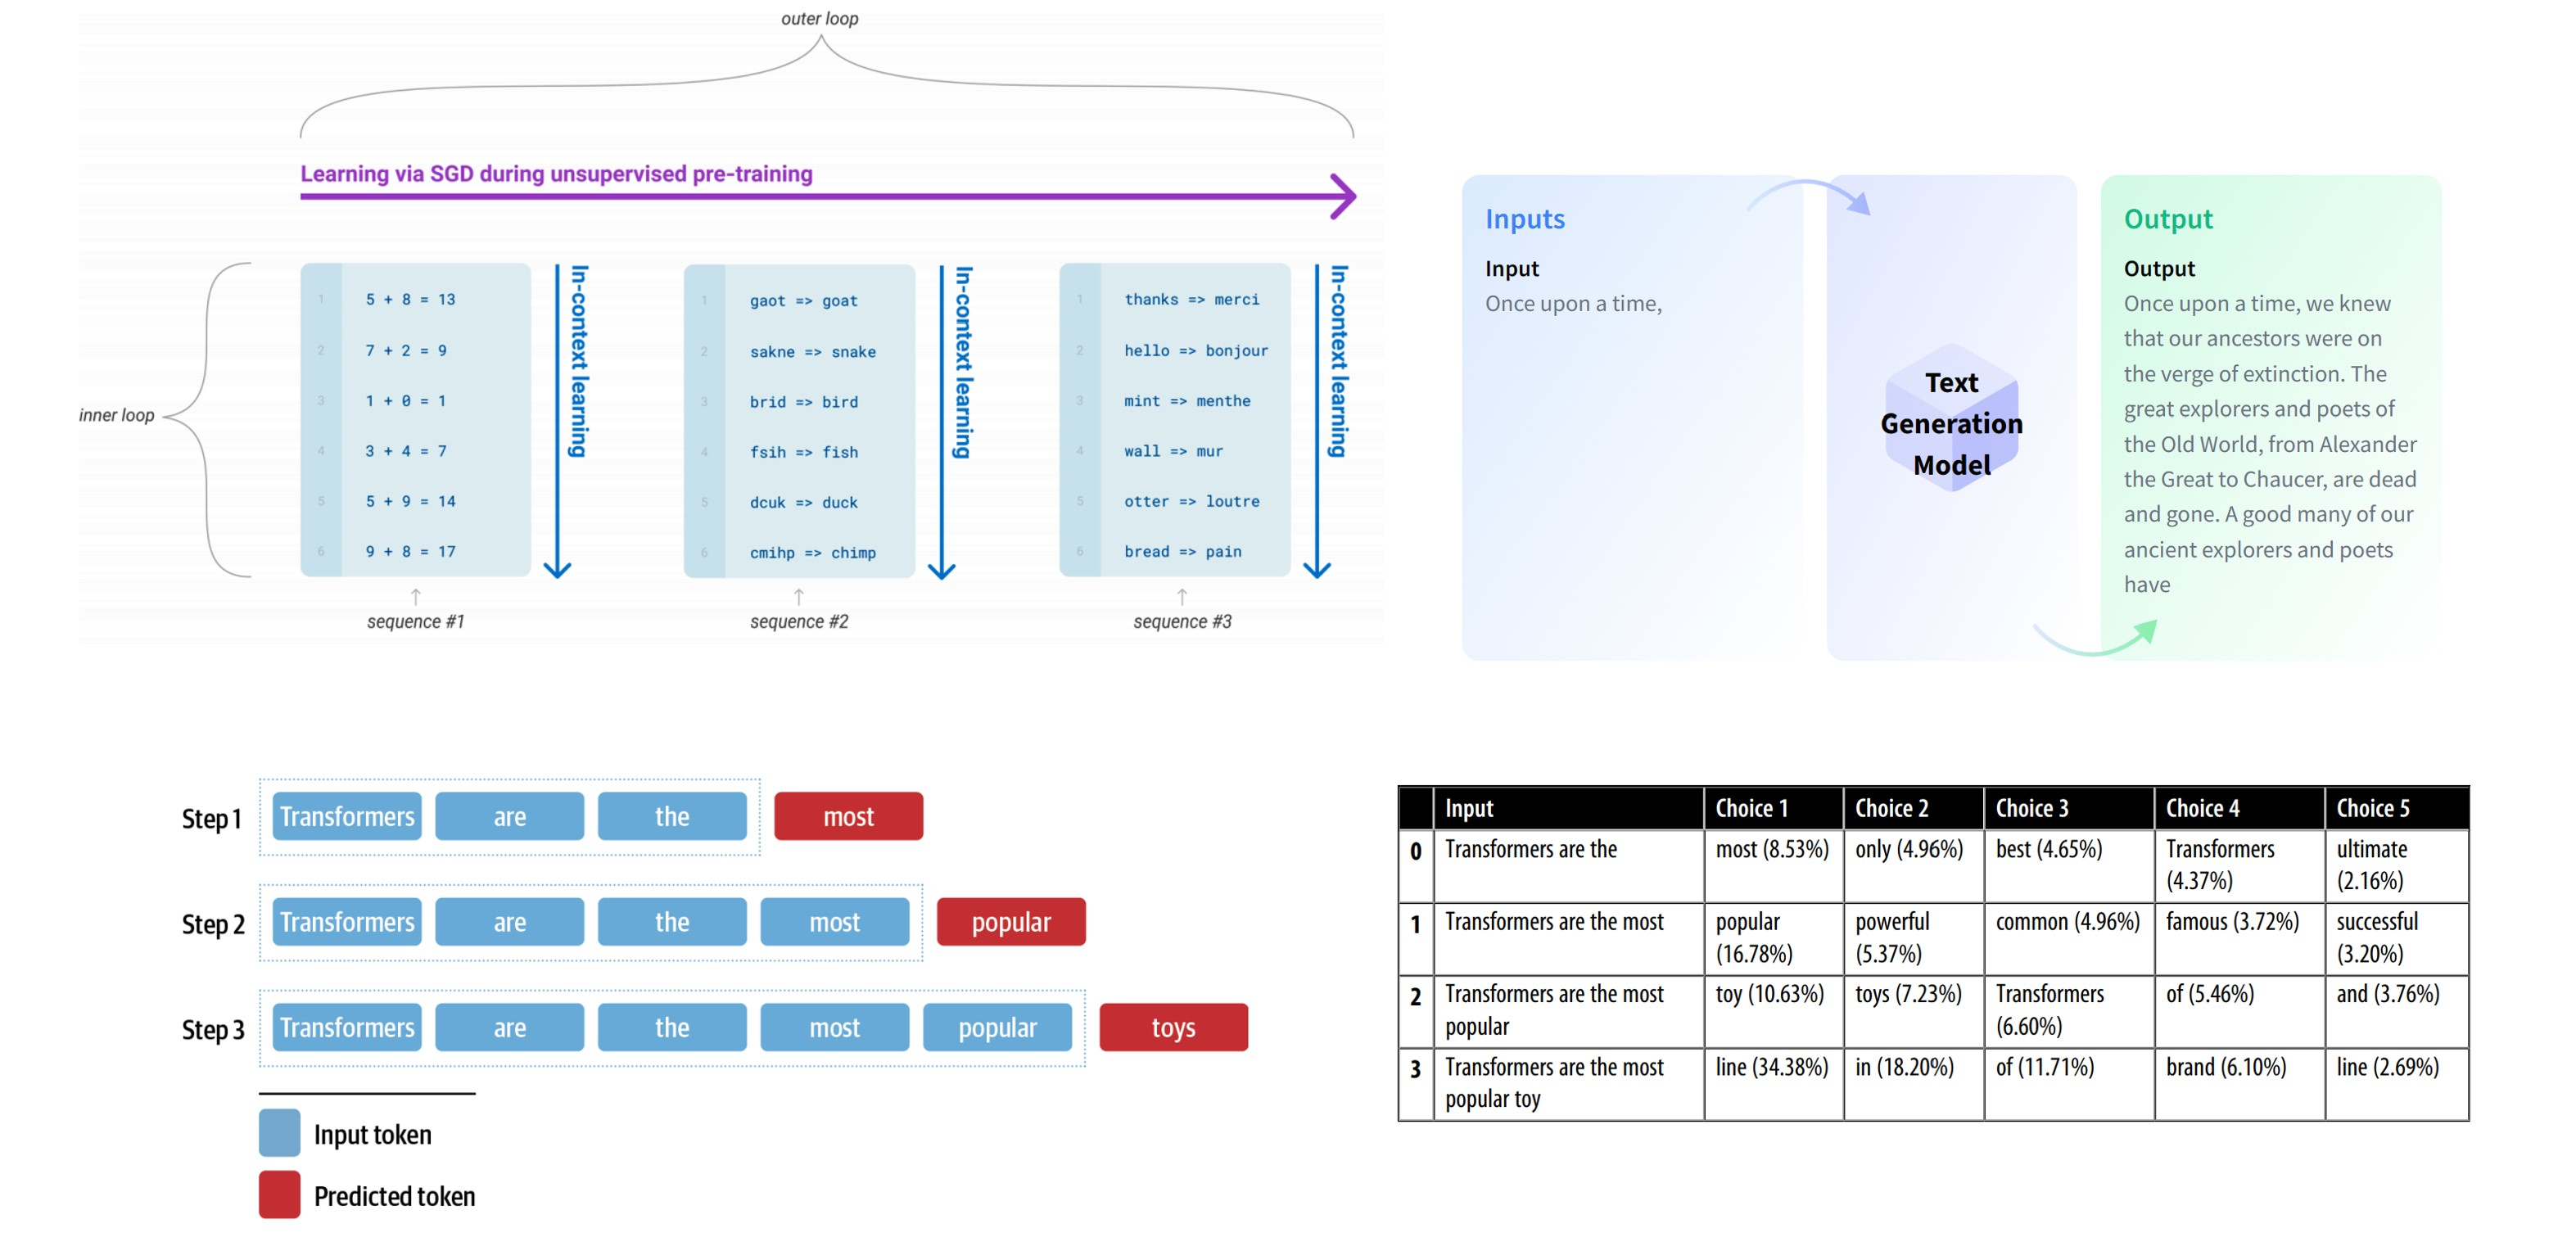

## Challanges in Generating Cohereent Text
- **Repetition**: The model can repeat itself, generating the same text over and over again.
- **Limited Vocabulary**: The model can use the same words and phrases over and over again.
- **Lack of Context**: The model can generate sentences that are grammatically correct, but lack context and meaning.





## How to Generate Text

- **Greedy Search**: The model generates the word with the highest probability as the next word.
- **Beam Search**: The model generates the top 𝑘 words and keeps track of the probability of each sequence. The sequence with the highest probability is used as the next sequence.
- **Top-K Sampling**: The model generates the top 𝑘 words and samples from those words using their probabilities as weights.
- **Top-p (nucleus) Sampling**: The model generates the smallest possible set of words whose cumulative probability exceeds the probability 𝑝. The model then samples from those words using their probabilities as weights.

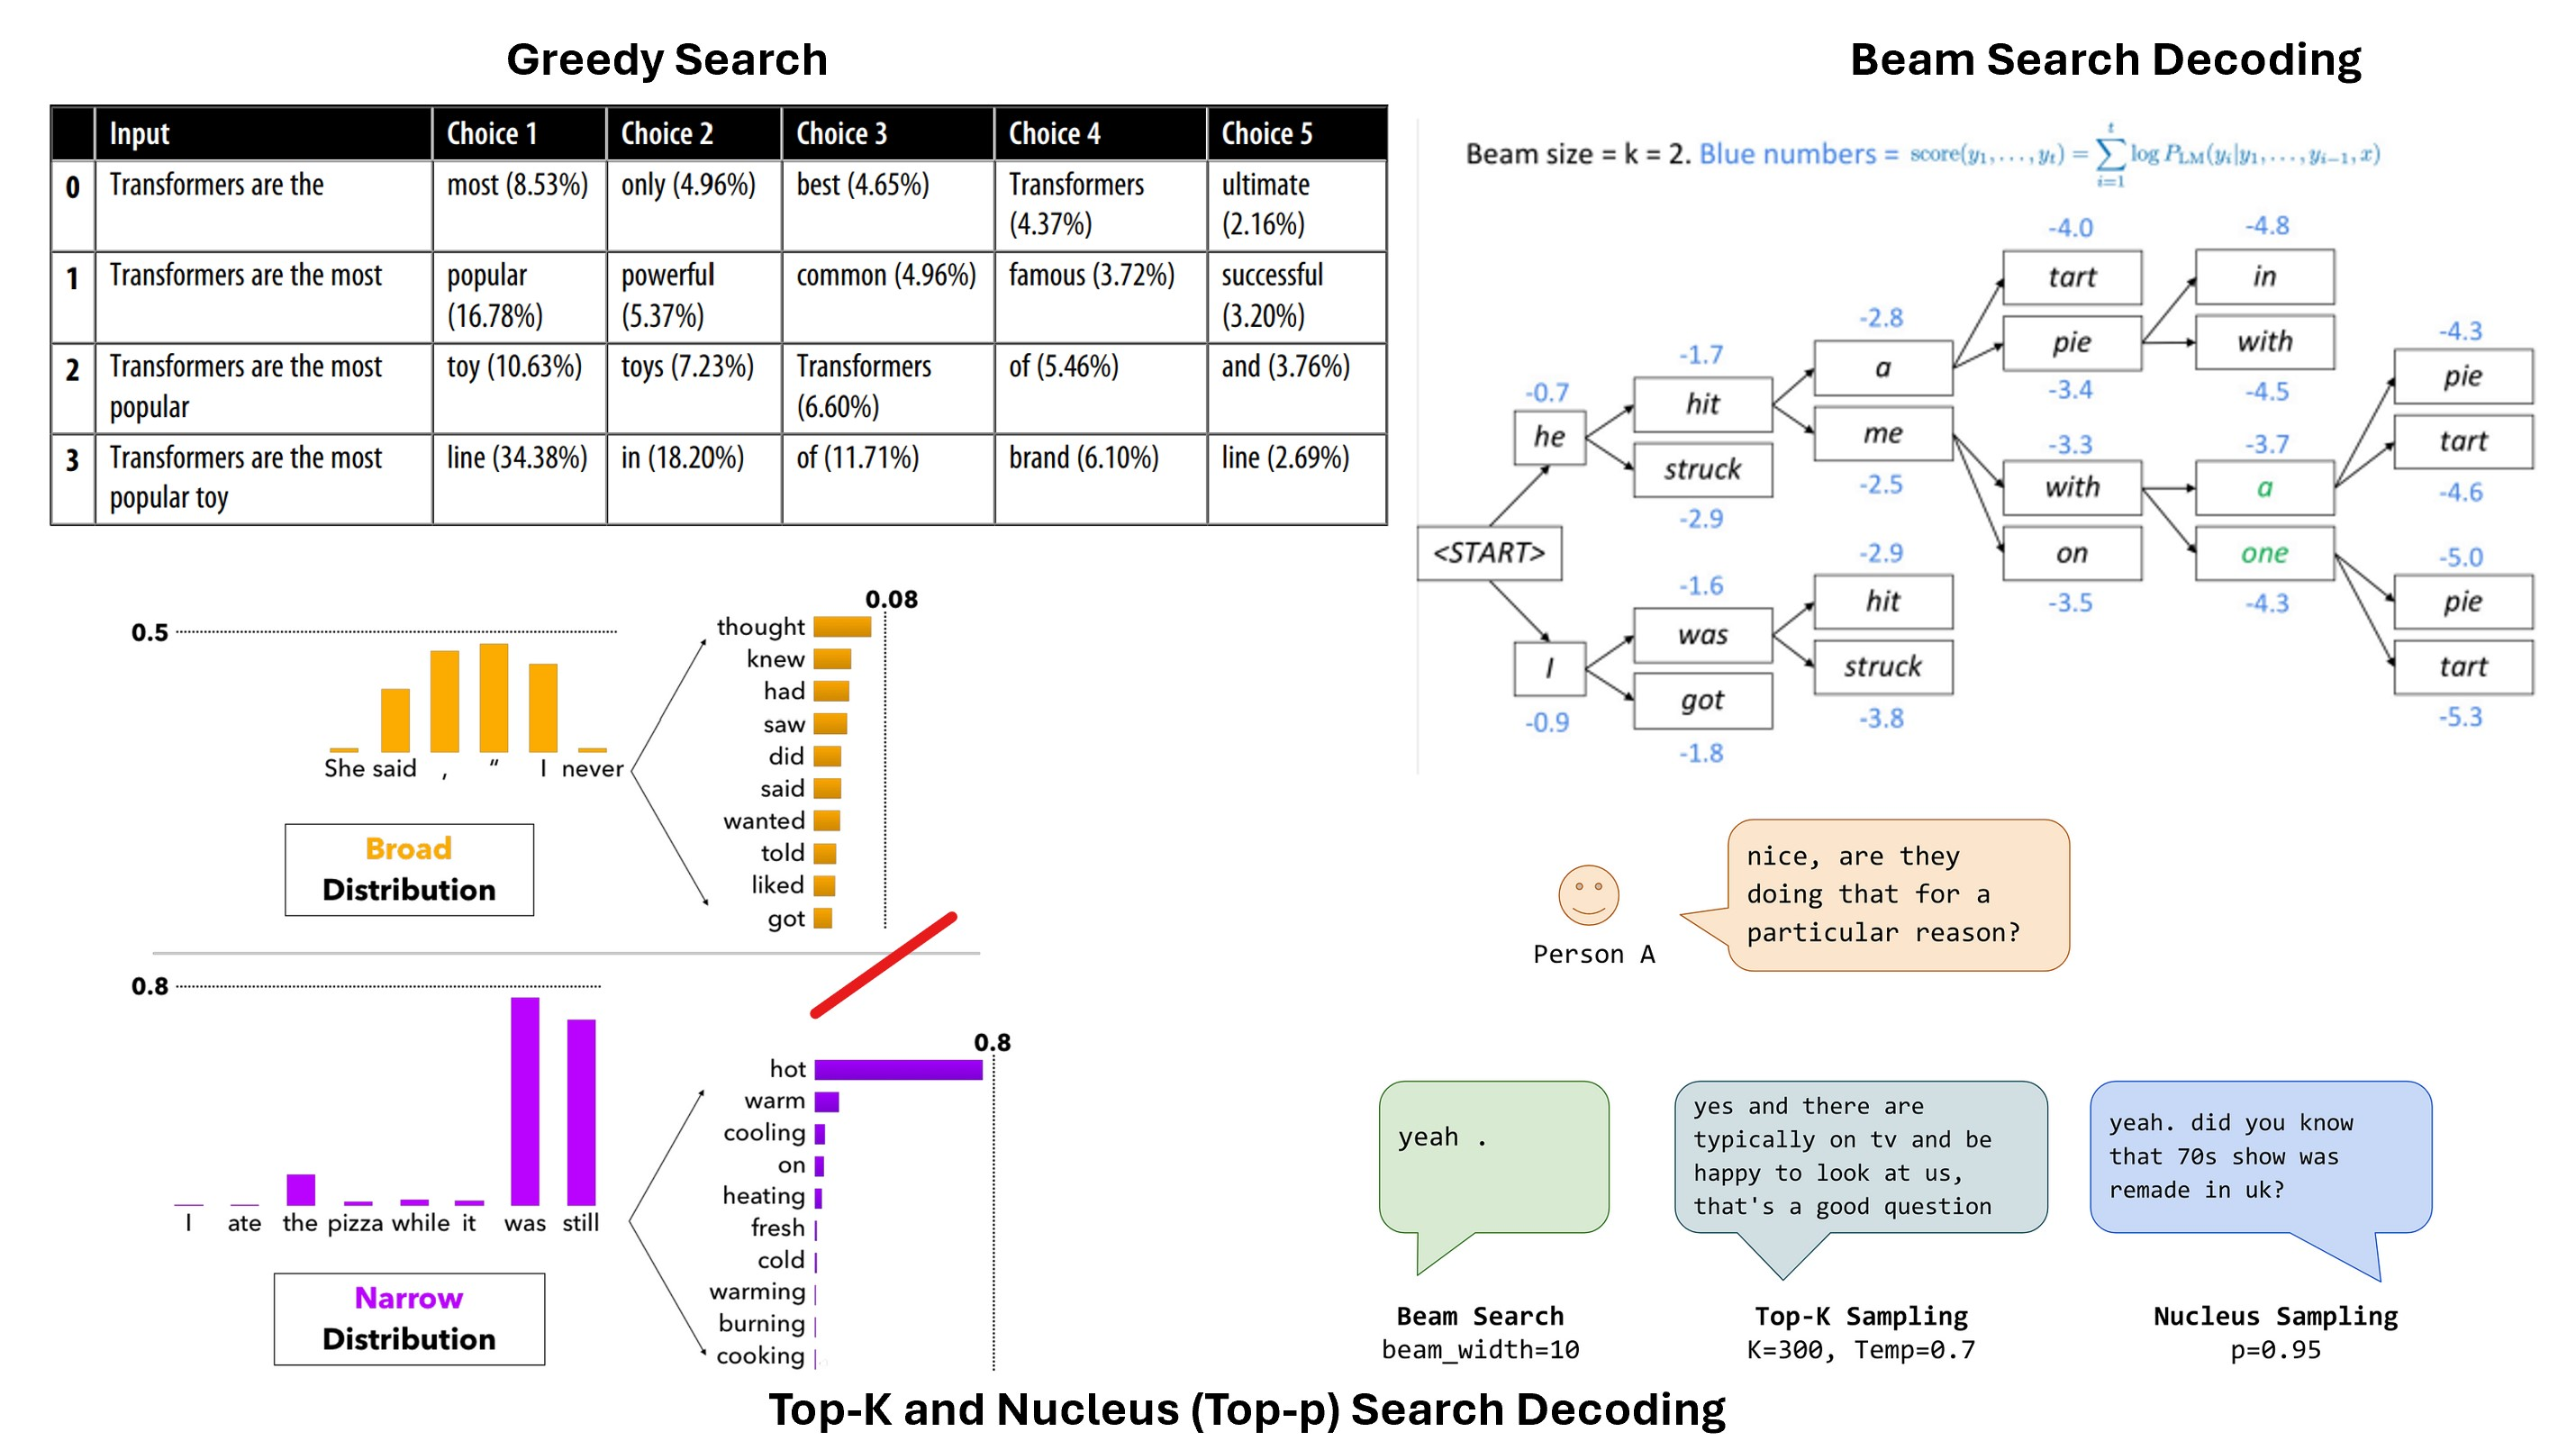

## GPT 2 Model
https://huggingface.co/gpt2

**1. Architecture:**

- GPT-2 employs the transformer architecture, which utilizes self-attention mechanisms to capture contextual relationships in text. It consists of multiple layers, each containing self-attention and feed-forward neural networks.

**2. Pre-training:**

- GPT-2 is initially pre-trained on a massive corpus of text data. During pre-training, the model learns to predict the next word in a sentence given the previous words. This process enables the model to learn contextual information and patterns from the input text.

**3. Attention Mechanism:**

- GPT-2's self-attention mechanism allows it to weigh the importance of each word/token in relation to others. This enables the model to understand the relationships between words regardless of their position in the sequence.

**4. Fine-tuning and Adaptation:**

- After pre-training, GPT-2 can be fine-tuned on specific tasks by providing task-specific training data. This process adapts the model to perform well on tasks like text completion, question answering, or text generation.

**5. Text Generation:**

- To generate text, GPT-2 takes an initial input (prompt) and generates new text by predicting the next word/token based on the context of the input and the words it has already generated. The model samples from its predicted word distribution to produce a sequence of words, resulting in coherent and contextually relevant text generation.

## Writing Code

In [ ]:
# !pip install transformers

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
model_name = "gpt2-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [4]:
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [5]:
input_text = "i am really impressed"
max_length = 128

input_ids = tokenizer(input_text, return_tensors="pt")

In [6]:
input_ids

{'input_ids': tensor([[   72,   716,  1107, 12617]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [7]:
input_ids = input_ids['input_ids'].to(device)

In [8]:
output = model.generate(input_ids, max_length=max_length, num_beams=5, do_sample=False)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [11]:
output
#output.shape

tensor([[   72,   716,  1107, 12617,   351,   262,  3081,   286,   262,  1720,
           290,   262,  6491,  2139,    13,   198,   198, 15322,   642,   503,
           286,   642,   416, 19200,   422,  3878,  1720,     0,   314,   423,
           587,  1262,   428,  1720,   329,   625,   257,   614,   783,   290,
           314,   423,  1239,   550,   257,  1917,   351,   340,    13,   314,
           423,   587,  1262,   428,  1720,   329,   625,   257,   614,   783,
           290,   314,   423,  1239,   550,   257,  1917,   351,   340,    13,
           314,   423,   587,  1262,   428,  1720,   329,   625,   257,   614,
           783,   290,   314,   423,  1239,   550,   257,  1917,   351,   340,
            13,   314,   423,   587,  1262,   428,  1720,   329,   625,   257,
           614,   783,   290,   314,   423,  1239,   550,   257,  1917,   351,
           340,    13,   314,   423,   587,  1262,   428,  1720,   329,   625,
           257,   614,   783,   290,   314,   423,  

In [12]:
print(tokenizer.decode(output[0]))

i am really impressed with the quality of the product and the customer service.

Rated 5 out of 5 by Anonymous from Great product! I have been using this product for over a year now and I have never had a problem with it. I have been using this product for over a year now and I have never had a problem with it. I have been using this product for over a year now and I have never had a problem with it. I have been using this product for over a year now and I have never had a problem with it. I have been using this product for over a year now and I have never had


In [13]:
output = model.generate(input_ids, max_length=max_length, num_beams=5,
                        do_sample=False, no_repeat_ngram_size=2)
tokenizer.decode(output[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'i am really impressed with the quality of the product and the customer service.\n\nRated 5 out of 5 by Anonymous from Great product! I have been using this product for over a year now and I am very pleased with it. It is very easy to use and works great. I would recommend it to anyone who is looking for a product that will last a long time.<|endoftext|>'

### Nucleus Search

In [17]:
input_text = '''welcome to Large Language Model (LLM) tutorial,
              We will talk about large language'''
max_length = 128

input_ids = tokenizer(input_text, return_tensors="pt")
input_ids = input_ids['input_ids'].to(device)

output = model.generate(input_ids, max_length=max_length,
                        do_sample=True, top_p=1)
tokenizer.decode(output[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'welcome to Large Language Model (LLM) tutorial,\n              We will talk about large language models,\n    \xa0where we develop a model that we can\nreuse with many other languages. We will look at\nthe advantages that our model gives over the\nexisting languages. We will take a look at the\ndifferences between the LLM and other language models for large\nlanguage models, and discuss possible improvements. \n(     \nFor a more detailed discussion of these techniques,\nvisit\xa0 \xa0 these two posts'

In [18]:
input_text = '''Happy to meet all of you for today's'''
max_length = 128

input_ids = tokenizer(input_text, return_tensors="pt")
input_ids = input_ids['input_ids'].to(device)

output = model.generate(input_ids, max_length=max_length,
                        do_sample=True, top_p=1)
tokenizer.decode(output[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"Happy to meet all of you for today's chat!\n\n\nSo today our guest is…\n\n\nMilo Yiannopoulos\n\n\nNow in many ways that's a bit odd, but I think you'll find that he's a perfectly fine guy. I'm not sure I would characterize him as a racist, a xenophobe, a sexist, some sort of political provocateur. Or even a bigoted one, it's hard to describe his politics other than his belief in free speech—which you could just as easily characterize as bigotry but not a good one.\n\n\nTo answer your question, Milo is not anti-Semitic"